In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv("loan_data_nov2023.csv")

In [20]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.0,RENT,24000.0,33
1,0,2400,10.99,C,25.0,RENT,12252.0,31
2,0,10000,13.49,C,13.0,RENT,49200.0,24
3,0,5000,10.99,A,3.0,RENT,36000.0,39
4,0,3000,10.99,E,9.0,RENT,48000.0,24


In [21]:
df.drop('default', axis=1, inplace=True)

In [22]:
df.columns

Index(['amount', 'interest', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29091 entries, 0 to 29090
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amount     29091 non-null  int64  
 1   interest   29091 non-null  float64
 2   grade      29091 non-null  object 
 3   years      29091 non-null  float64
 4   ownership  29091 non-null  object 
 5   income     29091 non-null  float64
 6   age        29091 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [24]:
df.describe()

,amount,interest,years,income,age
count,29091.000000,29091.000000,29091.000000,2.909100e+04,29091.000000
mean,9593.663848,11.003117,6.085422,6.696489e+04,27.698120
std,6323.467488,3.080636,6.593591,5.325318e+04,6.194617
min,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,5000.000000,8.490000,2.000000,4.000000e+04,23.000000
50%,8000.000000,10.990000,4.000000,5.640000e+04,26.000000
75%,12250.000000,13.110000,8.000000,8.000000e+04,30.000000
max,35000.000000,23.220000,62.000000,2.039784e+06,94.000000


In [25]:
df.isnull().sum()

amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [9]:
import seaborn as sns

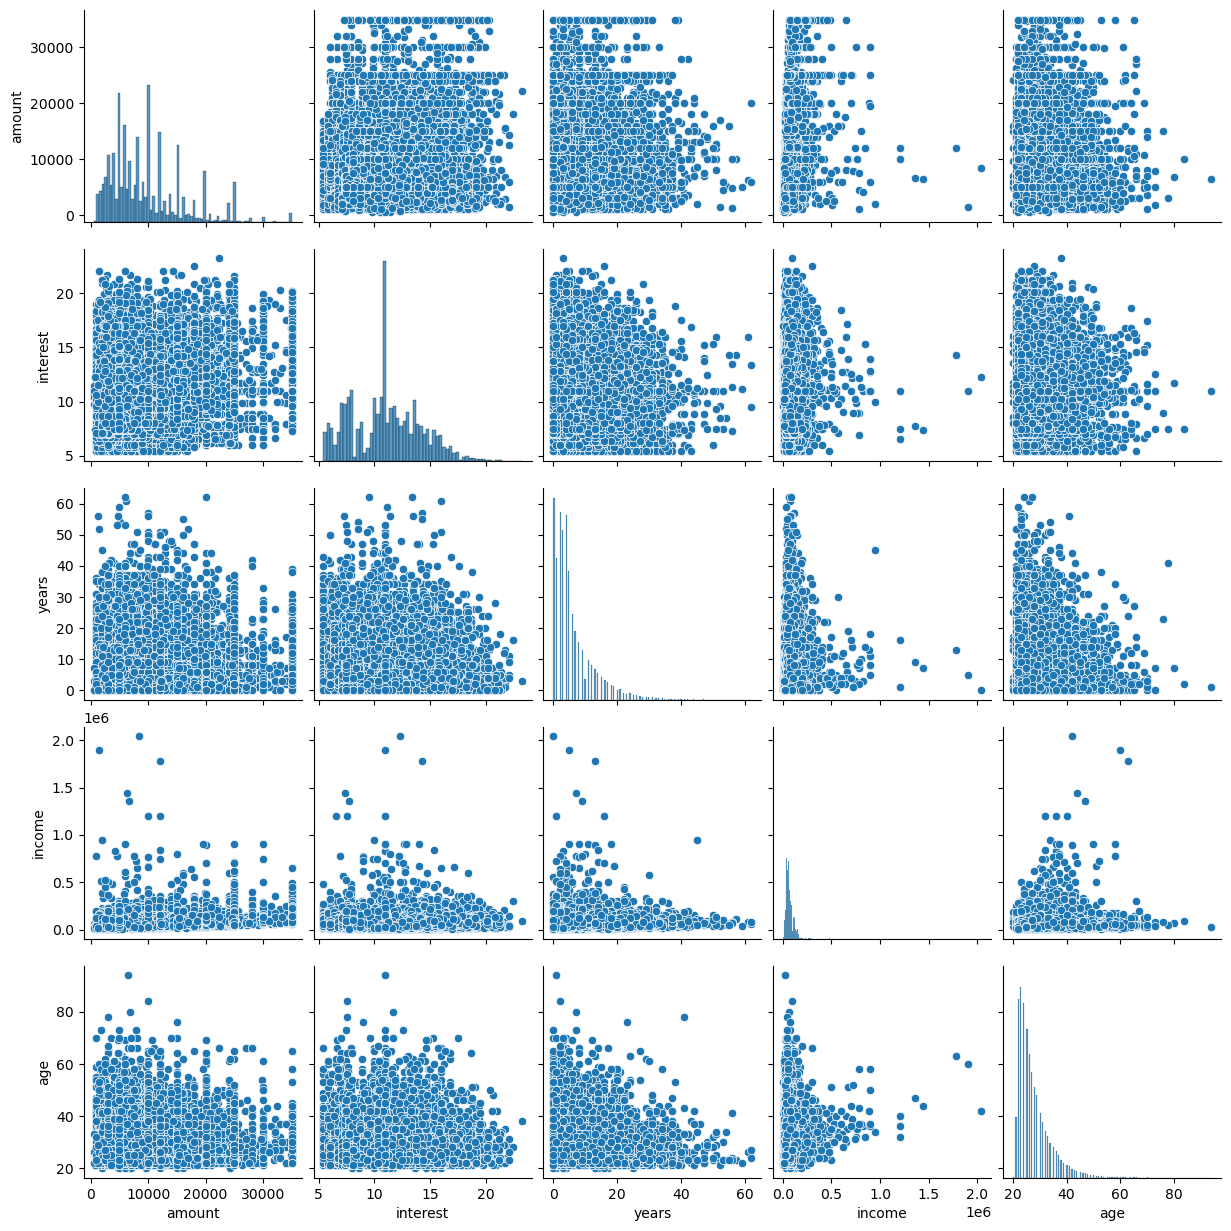

In [10]:
sns.pairplot(df)

In [26]:
df.columns = df.columns.astype(str)

In [30]:
cat_columns = ['grade', 'ownership']
cat_data = df[cat_columns]

ohe = OneHotEncoder(sparse=False)

encoded_data = ohe.fit_transform(cat_data)



encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(cat_columns))

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=cat_columns), encoded_df], axis=1)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
df_encoded.head()

,amount,interest,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,5000,10.65,10.0,24000.0,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2400,10.99,25.0,12252.0,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10000,13.49,13.0,49200.0,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5000,10.99,3.0,36000.0,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3000,10.99,9.0,48000.0,24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df_encoded.columns = df_encoded.columns.astype(str)

In [33]:
X = df_encoded.drop('amount', axis=1)
y = df_encoded['amount']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)


LinearRegression()

In [35]:
y_pred = lr.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 33969134.46255954


In [36]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.1501309169992302


In [41]:
# Columns to be scaled
columns_to_scale = ['amount', 'interest', 'years', 'income', 'age']

# Extract the columns to be scaled
data_to_scale = df_encoded[columns_to_scale]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
scaled_data = scaler.fit_transform(data_to_scale)

# Create a DataFrame with the scaled columns
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Replace original columns with scaled columns in the original DataFrame
df_encoded[columns_to_scale] = scaled_df



In [43]:
df_encoded.head()

,amount,interest,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0.130435,0.293820,0.161290,0.009824,0.175676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.055072,0.312921,0.403226,0.004053,0.148649,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.275362,0.453371,0.209677,0.022203,0.054054,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.130435,0.312921,0.048387,0.015719,0.256757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.072464,0.312921,0.145161,0.021613,0.054054,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
X = df_encoded.drop('amount', axis=1)
y = df_encoded['amount']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02853937731156922


In [47]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_squared}")

R-squared Score: 0.15013443508814595
